# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [24]:
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

#### 시드(seed) 고정  
매번 고정된 결과를 얻기 위해서 사용합니다.  
시드를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나올 수 있습니다.

In [26]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 읽어오기 및 데이터 확인

In [27]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [28]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']


In [46]:
x_train.columns

Index(['월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지'],
      dtype='object')

In [29]:
x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지
4,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소


#### train , validation data 나누기

In [30]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

#### 라벨인코딩(Label Encoding)

In [31]:

ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    X_val[feature] = le.transform(X_val[feature])



### Logistic Regression

In [70]:
model= LogisticRegression(random_state=42,penalty='l2',multi_class='multinomial', solver='sag', max_iter=1500)
model.fit(X_tr, Y_tr)

y_pred = model.predict(X_val)

C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


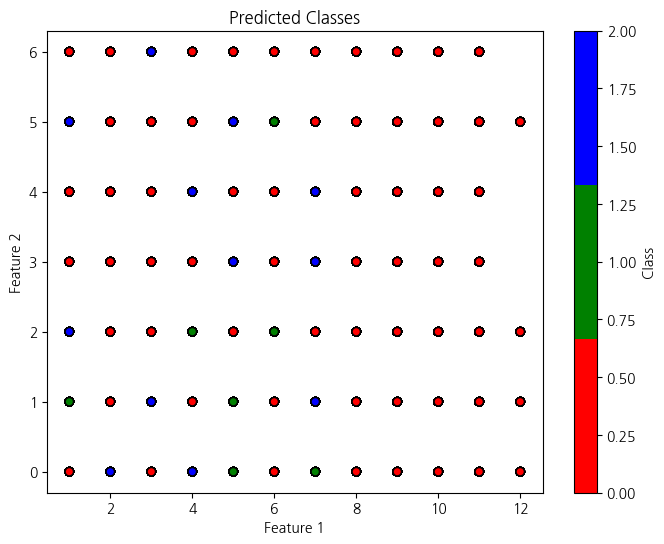

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 클래스 색상 정의
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors)

# Pandas DataFrame을 NumPy 배열로 변환
X_val_np = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
y_pred_np = y_pred.to_numpy() if isinstance(y_pred, pd.Series) else y_pred

# 예측된 클래스를 산점도로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_val_np[:, 0], X_val_np[:, 1], c=y_pred_np, cmap=cmap, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Classes')
plt.colorbar(label='Class')
plt.show()


#### 예측

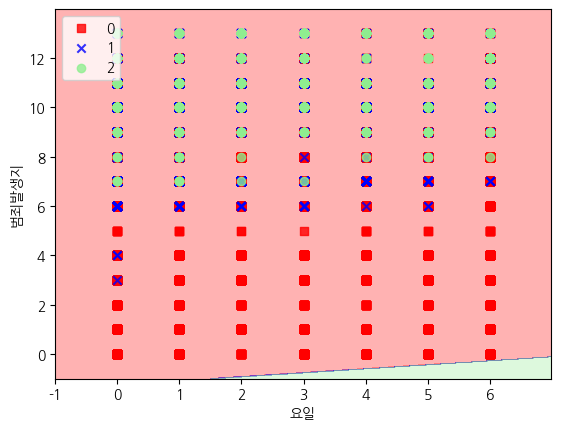

In [57]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution=0.02):
    """
    결정 경계 시각화
    :param x: feature 데이터
    :param y: class label
    :param classifier: 분류기
    :param resolution: 해상도
    """
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

# 결정 경계 시각화
plot_decision_regions(X_val[['요일', '범죄발생지']].values, y_pred, classifier=model)
plt.xlabel('요일')
plt.ylabel('범죄발생지')
plt.legend(loc='upper left')
plt.show()


정확도 : 0.4531
정말도 : 0.4355
Recall: 0.4531
F1 Score: 0.3798
Confusion Matrix:
[[9438  723  758]
 [5692 1196  754]
 [5275  646  840]]


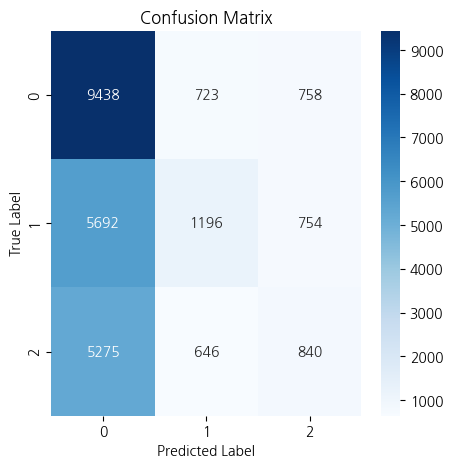

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Sampling

##### 오버샘플링

In [79]:
ros=RandomUnderSampler(random_state=42)
x_tr_over,y_tr_over=ros.fit_resample(X_tr,Y_tr)


In [84]:
model= LogisticRegression(random_state=42,penalty='l2',multi_class='multinomial', solver='sag', max_iter=1000)
model.fit(x_tr_over,y_tr_over)

y_pred = model.predict(X_val)

C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


정확도 : 0.3992
정말도 : 0.4299
Recall: 0.3992
F1 Score: 0.4007
Confusion Matrix:
[[3716 3559 3644]
 [1760 3021 2861]
 [1429 1961 3371]]


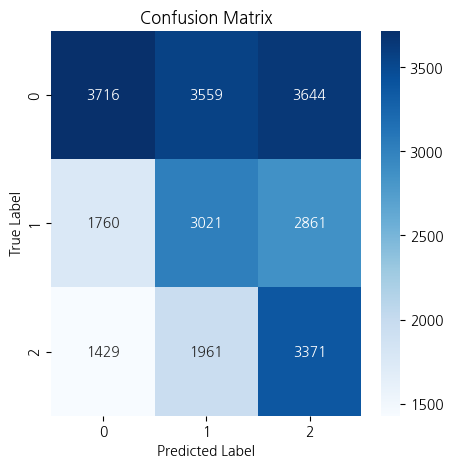

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

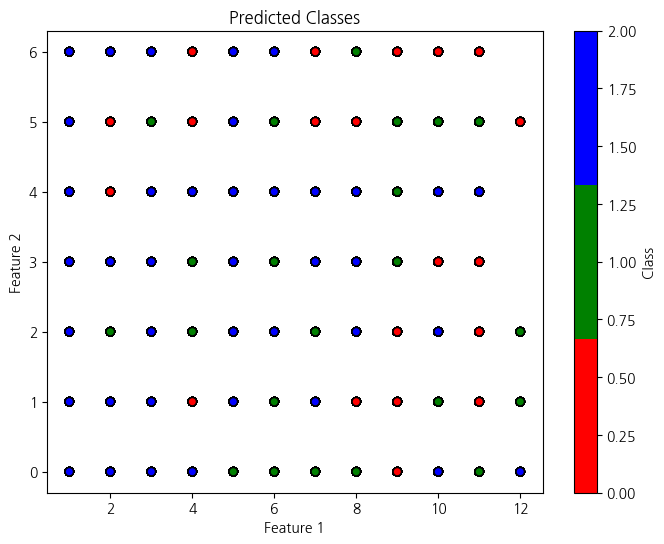

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 클래스 색상 정의
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors)

# Pandas DataFrame을 NumPy 배열로 변환
X_val_np = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
y_pred_np = y_pred.to_numpy() if isinstance(y_pred, pd.Series) else y_pred

# 예측된 클래스를 산점도로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_val_np[:, 0], X_val_np[:, 1], c=y_pred_np, cmap=cmap, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Classes')
plt.colorbar(label='Class')
plt.show()


##### SMOTE

In [94]:
smote=SMOTE(random_state=42)
x_tr_smote,y_tr_smote=smote.fit_resample(X_tr,Y_tr)

In [97]:
model= LogisticRegression(random_state=42,penalty='l2',multi_class='multinomial', solver='sag', max_iter=3000)
model.fit(x_tr_smote,y_tr_smote)

y_pred = model.predict(X_val)

C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


정확도 : 0.4200
정말도 : 0.4383
Recall: 0.4200
F1 Score: 0.4235
Confusion Matrix:
[[4627 3209 3083]
 [2092 2778 2772]
 [1763 1767 3231]]


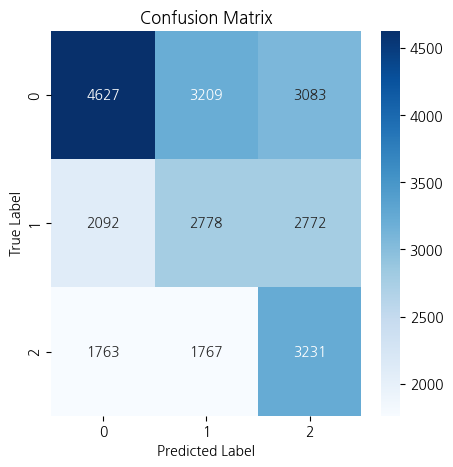

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

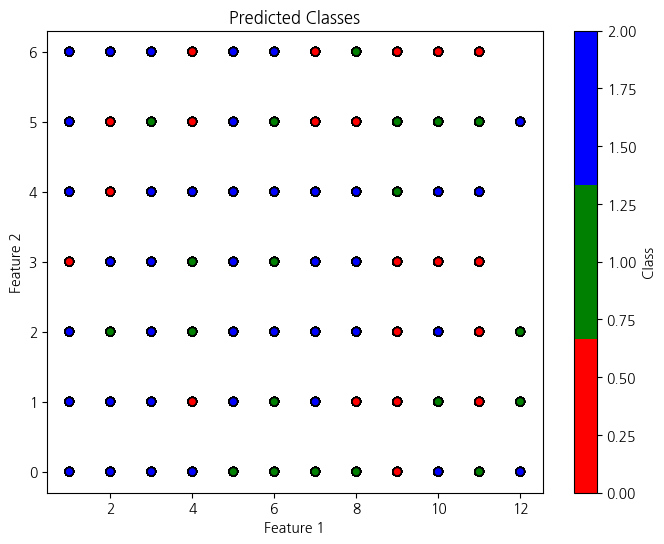

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 클래스 색상 정의
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors)

# Pandas DataFrame을 NumPy 배열로 변환
X_val_np = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
y_pred_np = y_pred.to_numpy() if isinstance(y_pred, pd.Series) else y_pred

# 예측된 클래스를 산점도로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_val_np[:, 0], X_val_np[:, 1], c=y_pred_np, cmap=cmap, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Classes')
plt.colorbar(label='Class')
plt.show()
